In [1]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# ** Data Preparation **

## *Dataset citibike_trips*

In [2]:
df = pd.read_csv('citibike_trips_2015-2017.csv', parse_dates=['starttime', 'stoptime'])

In [3]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan
0,857,2016-08-06 11:16:51,2016-08-06 11:31:08,332,Cherry St,40.712199,-73.979481,351,Front St & Maiden Ln,40.705310,-74.006126,25484,Subscriber,1957,male,NaN
1,567,2016-08-17 13:05:44,2016-08-17 13:15:11,3125,45 Rd & 11 St,40.747086,-73.949772,3126,44 Dr & Jackson Ave,40.747182,-73.943264,21512,Subscriber,1977,male,NaN
2,660,2016-08-06 20:13:27,2016-08-06 20:24:27,217,Old Fulton St,40.702772,-73.993836,398,Atlantic Ave & Furman St,40.691652,-73.999979,23890,Subscriber,1971,female,NaN
3,947,2016-08-28 15:32:13,2016-08-28 15:48:00,217,Old Fulton St,40.702772,-73.993836,398,Atlantic Ave & Furman St,40.691652,-73.999979,25169,Subscriber,1954,female,NaN
4,474,2016-08-24 00:29:13,2016-08-24 00:37:07,3265,E 2 St & 2 Ave,40.724563,-73.989444,295,Pike St & E Broadway,40.714067,-73.992939,17290,Subscriber,1989,male,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tripduration             30000 non-null  int64         
 1   starttime                30000 non-null  datetime64[ns]
 2   stoptime                 30000 non-null  datetime64[ns]
 3   start_station_id         30000 non-null  int64         
 4   start_station_name       30000 non-null  object        
 5   start_station_latitude   30000 non-null  float64       
 6   start_station_longitude  30000 non-null  float64       
 7   end_station_id           30000 non-null  int64         
 8   end_station_name         30000 non-null  object        
 9   end_station_latitude     30000 non-null  float64       
 10  end_station_longitude    30000 non-null  float64       
 11  bikeid                   30000 non-null  int64         
 12  usertype                 30000 n

## ** ekstrak data kolom 'starttime' dan 'stoptime' **

In [5]:
df['start_month'] = df['starttime'].dt.month_name()
df['start_year'] = df['starttime'].dt.year
df['start_date'] = df['starttime'].dt.day
df['start_hour'] = df['starttime'].dt.strftime('%H')

df['stop_month'] = df['stoptime'].dt.month_name()
df['stop_year'] = df['stoptime'].dt.year
df['stop_date'] = df['stoptime'].dt.day
df['stop_hour'] = df['stoptime'].dt.strftime('%H')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tripduration             30000 non-null  int64         
 1   starttime                30000 non-null  datetime64[ns]
 2   stoptime                 30000 non-null  datetime64[ns]
 3   start_station_id         30000 non-null  int64         
 4   start_station_name       30000 non-null  object        
 5   start_station_latitude   30000 non-null  float64       
 6   start_station_longitude  30000 non-null  float64       
 7   end_station_id           30000 non-null  int64         
 8   end_station_name         30000 non-null  object        
 9   end_station_latitude     30000 non-null  float64       
 10  end_station_longitude    30000 non-null  float64       
 11  bikeid                   30000 non-null  int64         
 12  usertype                 30000 n

In [7]:
# ubah jenis data pada kolom start_hour dan stop_hour menjadi tipe data numeric
df['start_hour'] = pd.to_numeric(df['start_hour'])
df['stop_hour'] = pd.to_numeric(df['stop_hour'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tripduration             30000 non-null  int64         
 1   starttime                30000 non-null  datetime64[ns]
 2   stoptime                 30000 non-null  datetime64[ns]
 3   start_station_id         30000 non-null  int64         
 4   start_station_name       30000 non-null  object        
 5   start_station_latitude   30000 non-null  float64       
 6   start_station_longitude  30000 non-null  float64       
 7   end_station_id           30000 non-null  int64         
 8   end_station_name         30000 non-null  object        
 9   end_station_latitude     30000 non-null  float64       
 10  end_station_longitude    30000 non-null  float64       
 11  bikeid                   30000 non-null  int64         
 12  usertype                 30000 n

In [9]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,gender,customer_plan,start_month,start_year,start_date,start_hour,stop_month,stop_year,stop_date,stop_hour
0,857,2016-08-06 11:16:51,2016-08-06 11:31:08,332,Cherry St,40.712199,-73.979481,351,Front St & Maiden Ln,40.705310,...,male,NaN,August,2016,6,11,August,2016,6,11
1,567,2016-08-17 13:05:44,2016-08-17 13:15:11,3125,45 Rd & 11 St,40.747086,-73.949772,3126,44 Dr & Jackson Ave,40.747182,...,male,NaN,August,2016,17,13,August,2016,17,13
2,660,2016-08-06 20:13:27,2016-08-06 20:24:27,217,Old Fulton St,40.702772,-73.993836,398,Atlantic Ave & Furman St,40.691652,...,female,NaN,August,2016,6,20,August,2016,6,20
3,947,2016-08-28 15:32:13,2016-08-28 15:48:00,217,Old Fulton St,40.702772,-73.993836,398,Atlantic Ave & Furman St,40.691652,...,female,NaN,August,2016,28,15,August,2016,28,15
4,474,2016-08-24 00:29:13,2016-08-24 00:37:07,3265,E 2 St & 2 Ave,40.724563,-73.989444,295,Pike St & E Broadway,40.714067,...,male,NaN,August,2016,24,0,August,2016,24,0


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tripduration,30000.0,846.518133,3212.900695,61.000000,365.000000,596.000000,997.000000,289666.000000
start_station_id,30000.0,948.184100,1121.198331,72.000000,325.000000,446.000000,529.000000,3649.000000
start_station_latitude,30000.0,40.736127,0.024022,40.655949,40.719261,40.735877,40.751873,40.814394
start_station_longitude,30000.0,-73.987738,0.015094,-74.025353,-73.998512,-73.988639,-73.978985,-73.907744
end_station_id,30000.0,908.159800,1089.263102,72.000000,323.000000,444.000000,523.000000,3648.000000
end_station_latitude,30000.0,40.735716,0.023656,40.646768,40.719116,40.735877,40.751551,40.814326
end_station_longitude,30000.0,-73.988194,0.015156,-74.025353,-73.998842,-73.989900,-73.979661,-73.913669
bikeid,30000.0,21001.621467,4453.213508,14529.000000,17395.750000,20174.500000,23821.250000,33459.000000
birth_year,30000.0,1964.435900,18.688594,1874.000000,1951.000000,1957.000000,1977.000000,2001.000000
customer_plan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.describe(include='O').T

,count,unique,top,freq
start_station_name,30000,747,Lexington Ave & E 24 St,261
end_station_name,30000,750,Pershing Square North,243
usertype,30000,2,Subscriber,29731
gender,30000,3,male,23752
start_month,30000,12,April,3000
stop_month,30000,12,July,3002


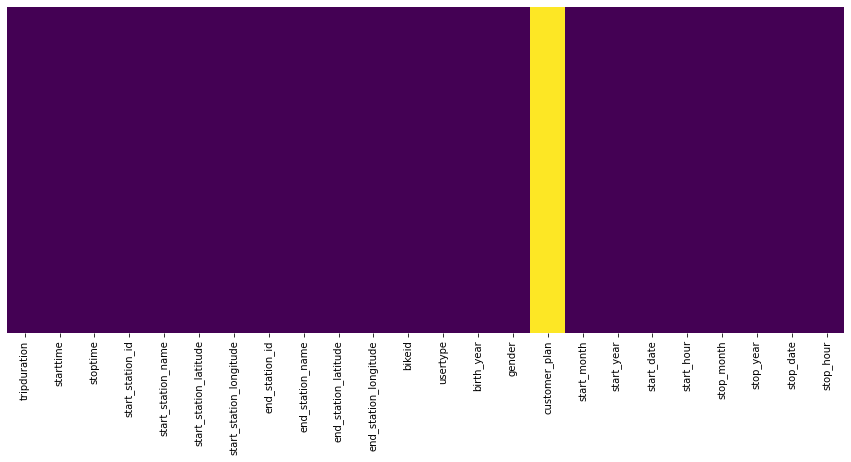

In [12]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
# karena data di kolom customer_plan tidak ada, kolom ini bisa didrop
df.drop(columns=['customer_plan'], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tripduration             30000 non-null  int64         
 1   starttime                30000 non-null  datetime64[ns]
 2   stoptime                 30000 non-null  datetime64[ns]
 3   start_station_id         30000 non-null  int64         
 4   start_station_name       30000 non-null  object        
 5   start_station_latitude   30000 non-null  float64       
 6   start_station_longitude  30000 non-null  float64       
 7   end_station_id           30000 non-null  int64         
 8   end_station_name         30000 non-null  object        
 9   end_station_latitude     30000 non-null  float64       
 10  end_station_longitude    30000 non-null  float64       
 11  bikeid                   30000 non-null  int64         
 12  usertype                 30000 n

Informasi tentang 'age' bisa didapat dari kolom birth_year dengan asumsi umur dihitung terhadap start_year

In [15]:
df['customer_age'] = df['start_year'] - df['birth_year']

In [16]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,gender,start_month,start_year,start_date,start_hour,stop_month,stop_year,stop_date,stop_hour,customer_age
0,857,2016-08-06 11:16:51,2016-08-06 11:31:08,332,Cherry St,40.712199,-73.979481,351,Front St & Maiden Ln,40.705310,...,male,August,2016,6,11,August,2016,6,11,59
1,567,2016-08-17 13:05:44,2016-08-17 13:15:11,3125,45 Rd & 11 St,40.747086,-73.949772,3126,44 Dr & Jackson Ave,40.747182,...,male,August,2016,17,13,August,2016,17,13,39
2,660,2016-08-06 20:13:27,2016-08-06 20:24:27,217,Old Fulton St,40.702772,-73.993836,398,Atlantic Ave & Furman St,40.691652,...,female,August,2016,6,20,August,2016,6,20,45
3,947,2016-08-28 15:32:13,2016-08-28 15:48:00,217,Old Fulton St,40.702772,-73.993836,398,Atlantic Ave & Furman St,40.691652,...,female,August,2016,28,15,August,2016,28,15,62
4,474,2016-08-24 00:29:13,2016-08-24 00:37:07,3265,E 2 St & 2 Ave,40.724563,-73.989444,295,Pike St & E Broadway,40.714067,...,male,August,2016,24,0,August,2016,24,0,27


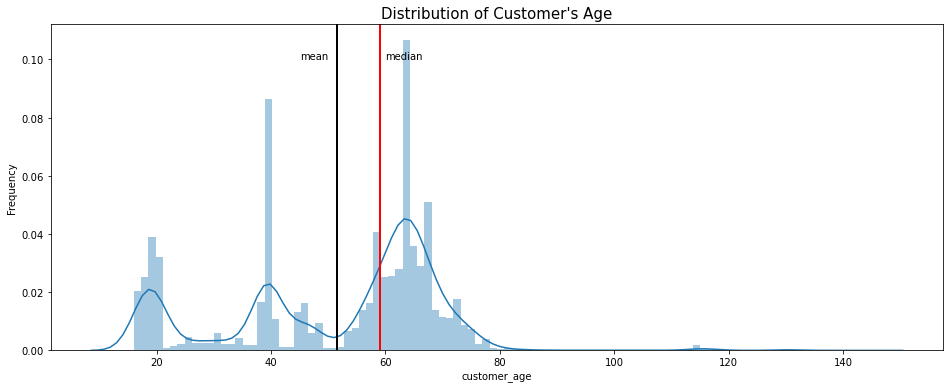

In [17]:
plt.figure(figsize=(16, 6))
plt.title("Distribution of Customer's Age", fontsize=15)
plt.ylabel('Frequency', fontsize=10)
sns.distplot(df['customer_age'], bins=100)
plt.axvline(x=df['customer_age'].median(), linewidth=2, color = 'r')
plt.axvline(x=df['customer_age'].mean(), linewidth=2, color = 'k')
plt.text(45, 0.1, 'mean', fontsize=10)
plt.text(60, 0.1, 'median', fontsize=10)
plt.show()

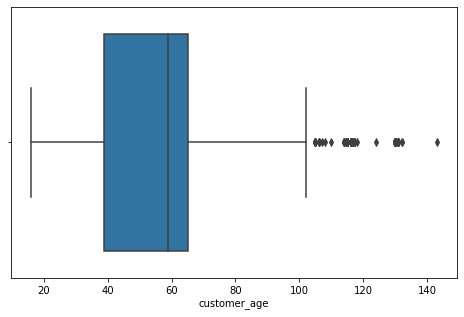

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(df['customer_age'])
plt.show()

In [19]:
# cek distribusi data customer_age
df['customer_age'].describe()

count    30000.000000
mean        51.464100
std         18.431253
min         16.000000
25%         39.000000
50%         59.000000
75%         65.000000
max        143.000000
Name: customer_age, dtype: float64

In [20]:
print(f"Median = {df['customer_age'].median()}")
print(f"Mode = {df['customer_age'].mode()}")

Median = 59.0
Mode = 0    63
dtype: int64


In [21]:
# jumlah customer dengan usia diatas 100 tahun
df[df['customer_age'] >= 100]['customer_age'].count()

165

**insight:**

Dari data usia customer (customer_age), diketahui usia paling muda dari customer adalah 16 tahun, dengan distribusi data yang dipengaruhi outliers, dimana terdapat data rentang usia di atas 100 tahun. Usia dengan pengguna yang paling banyak diwakilkan dengan nilai mode, yaitu 63 tahun. Median data usia customer adalah 59 tahun, sementara rata-rata usia customer adalah 51 tahun. Nilai rata-rata tentu dipengaruhi oleh keberadaan value outliers, sehingga perlu ditinjau lebih jauh, terlebih lagi karena terdapat kejanggalan jika ada 165 data customer dengan usia diatas 100 tahun.

## ** Outlier data kolom customer_age **

Metode penentuan outliers bisa dilakukan dengan cara evaluasi terhadap nilai persentil Q1 dan Q3, evaluasi terhadap value Z score, atau menggunakan common sense

### 1. Penentuan Outliers dengan Evaluasi terhadap Q1 dan Q3

In [22]:
# cek outliers terhadap nilai persentil Q1 dan Q3 dari distribusi data customer_age
outliers = []
def outlier_iqr(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_fence = q1 -(1.5 * iqr) 
    upper_fence = q3 +(1.5 * iqr)
    for i in data:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers, lower_fence, upper_fence

In [23]:
outlier_datapoints = outlier_iqr(df['customer_age'])[0]

print(f'Jumlah outliers pada kolom customer_age = {len(outlier_datapoints)}')

Jumlah outliers pada kolom customer_age = 162


In [24]:
uppFence_age = outlier_iqr(df['customer_age'])[2]
print(f'upper fence data customer age pada boxplot = {uppFence_age}')

upper fence data customer age pada boxplot = 104.0


In [25]:
print(f'persentase jumlah data outliers kolom age = {round(162/30000*100, 2)}%')

persentase jumlah data outliers kolom age = 0.54%


======================================================================================

### 2. Penentuan Outliers dengan Evaluasi terhadap Value Z Score

In [26]:
# buat fungsi untuk mengumpulkan nilai-nilai outliers sebagai list, evaluasi terhadap formula z score

outliers = []
def detect_outliers(data):
    threshold=3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [27]:
# definisi kolom yang akan dievaluasi
check_age = df['customer_age']

In [28]:
# menginput data-data usia yang terdapat dalam kolom customer_age menjadi list (list_age)
list_age = []

for i in check_age:
    list_age.append(i)

In [29]:
# cek jumlah data yang terdapat dalam list_age >> sesuai dengan jumlah baris keseluruhan dataset
print(len(list_age))

30000


In [30]:
# menggunakan fungsi detect_outliers terhadap usia-usia yang ada dalam list_age
outliers = detect_outliers(list_age)

In [31]:
print(f"Jumlah outliers pada kolom customer_age hasil evaluasi terhadap value Z score: {len(outliers)}")

Jumlah outliers pada kolom customer_age hasil evaluasi terhadap value Z score: 151


In [32]:
print(f"batas bawah nilai outliers: {min(outliers)}")

batas bawah nilai outliers: 107


In [33]:
print(f'persentase jumlah data outliers kolom age = {round(151/30000*100, 2)}%')

persentase jumlah data outliers kolom age = 0.5%


### 3. Penentuan Outliers dengan Common Sense

Evaluasi rentang usia outliers yang didapatkan dari metode persentil Q1 - Q3 maupun metode evaluasi z score menunjukkan data outliers berada pada data diatas usia 104 dan 107 tahun.
Hal ini sulit untuk diterima oleh common sense karena jika evaluasi nilai outliers berdasarkan usia-usia tersebut, berarti masih terdapat data dengan usia customer di atas 90 tahun, atau bahkan 100 tahun seperti berikut:

In [34]:
# slicing data dengan usia customer antara 100 - 107 tahun
df[(df['customer_age'] > 100) & (df['customer_age'] < 107)]

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,gender,start_month,start_year,start_date,start_hour,stop_month,stop_year,stop_date,stop_hour,customer_age
6162,93,2016-01-15 18:50:28,2016-01-15 18:52:01,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,539,Metropolitan Ave & Bedford Ave,40.715348,...,male,January,2016,15,18,January,2016,15,18,106
6296,110,2016-01-16 12:44:18,2016-01-16 12:46:08,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3093,N 6 St & Bedford Ave,40.717452,...,male,January,2016,16,12,January,2016,16,12,106
8369,146,2016-05-16 10:56:13,2016-05-16 10:58:40,3093,N 6 St & Bedford Ave,40.717452,-73.958509,2002,Wythe Ave & Metropolitan Ave,40.716887,...,male,May,2016,16,10,May,2016,16,10,106
15578,1042,2017-07-21 09:38:06,2017-07-21 09:55:29,427,Bus Slip & State St,40.701907,-74.013942,3260,Mercer St & Bleecker St,40.727064,...,unknown,July,2017,21,9,July,2017,21,9,105
19107,123,2015-12-09 15:35:53,2015-12-09 15:37:57,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,3093,N 6 St & Bedford Ave,40.717452,...,male,December,2015,9,15,December,2015,9,15,105
19760,104,2015-12-21 14:20:27,2015-12-21 14:22:12,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,2002,Wythe Ave & Metropolitan Ave,40.716887,...,male,December,2015,21,14,December,2015,21,14,105
20140,1820,2015-07-04 19:22:59,2015-07-04 19:53:19,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,2002,Wythe Ave & Metropolitan Ave,40.716887,...,male,July,2015,4,19,July,2015,4,19,105
22828,590,2015-08-18 21:35:49,2015-08-18 21:45:39,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,382,University Pl & E 14 St,40.734927,...,male,August,2015,18,21,August,2015,18,21,105
24496,1133,2015-09-16 07:48:12,2015-09-16 08:07:05,393,E 5 St & Avenue C,40.722992,-73.979955,259,South St & Whitehall St,40.701221,...,male,September,2015,16,7,September,2015,16,8,102
24517,273,2015-09-22 18:22:10,2015-09-22 18:26:43,3093,N 6 St & Bedford Ave,40.717452,-73.958509,481,S 3 St & Bedford Ave,40.712605,...,male,September,2015,22,18,September,2015,22,18,105


Dari tabel di atas, masih terdapat beberapa baris data dengan usia customer di atas 100 tahun dan di bawah 107 tahun (dibawah rentang batas upperfence dari evaluasi terhadap persentil Q1 dan Q3).

Metode common sense yang digunakan antara lain mempertimbangkan usia manusia yang masih aktif beraktivitas sepeda dalam kota New York. Untuk menghindari asumsi tanpa dasar, data range usia bisa diambil dari sumber data yang kredibel. Dalam hal ini, source data yang digunakan adalah: https://www.nytimes.com/2020/01/30/us/us-life-expectancy.html yang menyebutkan bahwa life expectancy di US pada tahun 2018 adalah **78.7** tahun.

In [35]:
print(f"Jumlah data outliers diatas usia 78 tahun: {df[df['customer_age'] > 78]['customer_age'].count()}")

Jumlah data outliers diatas usia 78 tahun: 293


In [36]:
print(f'persentase jumlah data outliers kolom age = {round(293/30000*100, 2)}%')

persentase jumlah data outliers kolom age = 0.98%


## Handling data Outliers

Outliers data di feature customer_age dapat terjadi karena customer yang salah menginput data tahun kelahiran. Jika dibandingkan dengan data keseluruhan yang berjumlah 30000 baris, persentase data outliers hanya sebesar 0.54% pada evaluasi terhadap persentil Q1 dan Q3, dan/atau 0.5% pada evaluasi terhadap value Z score, dan/atau sebanyak 0.98% diatas usia life expectancy US pada tahun 2018 (78 tahun). Dari evaluasi terhadap metode-metode yang digunakan, persentase data outliers yang < 5% dari jumlah data keseluruhan memungkinkan untuk nilai outliers ini didrop dari dataset, sehingga tidak menimbulkan bias pada analisis terhadap usia, atau kolom customer_age.

Rentang data outliers yang dipilih adalah berdasarkan common sense, dimana dataset yang memiliki value di kolom customer_age > 78 tahun akan didrop dari dataset.

In [37]:
# slicing data untuk mengeluarkan data-data outliers. rename sebagai dataframe trips
trips = df[df['customer_age'] <= 78]

In [38]:
print(f"jumlah baris pada dataset tanpa outliers: {trips['customer_age'].count()}")

jumlah baris pada dataset tanpa outliers: 29707


## Dataframe final citibike_trips setelah handling data outliers

In [39]:
trips.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,gender,start_month,start_year,start_date,start_hour,stop_month,stop_year,stop_date,stop_hour,customer_age
0,857,2016-08-06 11:16:51,2016-08-06 11:31:08,332,Cherry St,40.712199,-73.979481,351,Front St & Maiden Ln,40.705310,...,male,August,2016,6,11,August,2016,6,11,59
1,567,2016-08-17 13:05:44,2016-08-17 13:15:11,3125,45 Rd & 11 St,40.747086,-73.949772,3126,44 Dr & Jackson Ave,40.747182,...,male,August,2016,17,13,August,2016,17,13,39
2,660,2016-08-06 20:13:27,2016-08-06 20:24:27,217,Old Fulton St,40.702772,-73.993836,398,Atlantic Ave & Furman St,40.691652,...,female,August,2016,6,20,August,2016,6,20,45
3,947,2016-08-28 15:32:13,2016-08-28 15:48:00,217,Old Fulton St,40.702772,-73.993836,398,Atlantic Ave & Furman St,40.691652,...,female,August,2016,28,15,August,2016,28,15,62
4,474,2016-08-24 00:29:13,2016-08-24 00:37:07,3265,E 2 St & 2 Ave,40.724563,-73.989444,295,Pike St & E Broadway,40.714067,...,male,August,2016,24,0,August,2016,24,0,27


In [40]:
desc = []
for i in trips.columns:
    desc.append([
        i, 
        trips[i].dtypes, 
        trips[i].isnull().sum(),
        round((((trips[i].isnull().sum())/(len(trips)))*100), 2),
        trips[i].nunique(), trips[i].drop_duplicates().sample(1).values
    ])

In [41]:
dfDesc = pd.DataFrame(desc, columns=['dataFeatures', 'dataType', 'null', 'nullPercentage', 'unique', 'sample'])
dfDesc

,dataFeatures,dataType,null,nullPercentage,unique,sample
0,tripduration,int64,0,0.0,2750,[61]
1,starttime,datetime64[ns],0,0.0,29601,[2015-12-03T20:40:16.000000000]
2,stoptime,datetime64[ns],0,0.0,29618,[2015-05-21T22:23:46.000000000]
3,start_station_id,int64,0,0.0,736,[3152]
4,start_station_name,object,0,0.0,746,[Greenwich St & North Moore St]
5,start_station_latitude,float64,0,0.0,763,[40.74469738]
6,start_station_longitude,float64,0,0.0,763,[-73.94308000000001]
7,end_station_id,int64,0,0.0,739,[3443]
8,end_station_name,object,0,0.0,750,[E 71 St & 2 Ave]
9,end_station_latitude,float64,0,0.0,765,[40.77677702]


In [42]:
# cek dataset dengan kondisi memiliki start_station_id dan end_station_id yang sama
trips[trips['start_station_id'] != trips['end_station_id']].head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,gender,start_month,start_year,start_date,start_hour,stop_month,stop_year,stop_date,stop_hour,customer_age
0,857,2016-08-06 11:16:51,2016-08-06 11:31:08,332,Cherry St,40.712199,-73.979481,351,Front St & Maiden Ln,40.705310,...,male,August,2016,6,11,August,2016,6,11,59
1,567,2016-08-17 13:05:44,2016-08-17 13:15:11,3125,45 Rd & 11 St,40.747086,-73.949772,3126,44 Dr & Jackson Ave,40.747182,...,male,August,2016,17,13,August,2016,17,13,39
2,660,2016-08-06 20:13:27,2016-08-06 20:24:27,217,Old Fulton St,40.702772,-73.993836,398,Atlantic Ave & Furman St,40.691652,...,female,August,2016,6,20,August,2016,6,20,45
3,947,2016-08-28 15:32:13,2016-08-28 15:48:00,217,Old Fulton St,40.702772,-73.993836,398,Atlantic Ave & Furman St,40.691652,...,female,August,2016,28,15,August,2016,28,15,62
4,474,2016-08-24 00:29:13,2016-08-24 00:37:07,3265,E 2 St & 2 Ave,40.724563,-73.989444,295,Pike St & E Broadway,40.714067,...,male,August,2016,24,0,August,2016,24,0,27


================================================================================

## *Dataset: citibike_stations*

In [43]:
st = pd.read_csv('citibike_stations.csv')

In [44]:
st.head()

,station_id,name,short_name,latitude,longitude,region_id,rental_methods,capacity,eightd_has_key_dispenser,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,eightd_has_available_keys,last_reported
0,173,Broadway & W 49 St,6708.02,-73.984527,40.760683,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01T00:00:00
1,393,E 5 St & Avenue C,5545.04,-73.979955,40.722992,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01T00:00:00
2,402,Broadway & E 22 St,6098.07,-73.989551,40.740343,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01T00:00:00
3,457,Broadway & W 58 St,6948.10,-73.981693,40.766953,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01T00:00:00
4,533,Broadway & W 38 St,6441.05,-73.987216,40.752996,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01T00:00:00


In [45]:
st.describe().T

,count,mean,std,min,25%,50%,75%,max
station_id,1571.0,3294.900700,1364.714752,72.000000,3200.000000,3761.000000,4200.500000,4639.00000
latitude,1571.0,-73.957937,0.040515,-74.086701,-73.988549,-73.955778,-73.923679,-73.88145
longitude,1571.0,40.752943,0.060932,40.633385,40.704467,40.747968,40.805713,40.88226
region_id,1567.0,74.795150,30.085906,70.000000,71.000000,71.000000,71.000000,311.00000
capacity,1571.0,30.049013,14.194177,0.000000,21.000000,25.000000,35.000000,91.00000
num_bikes_available,1571.0,13.661362,12.415417,0.000000,4.000000,11.000000,20.000000,77.00000
num_bikes_disabled,1571.0,1.401018,2.944211,0.000000,0.000000,1.000000,2.000000,77.00000
num_docks_available,1571.0,14.774029,12.977658,0.000000,4.000000,13.000000,21.000000,75.00000
num_docks_disabled,1571.0,0.162317,2.200985,0.000000,0.000000,0.000000,0.000000,68.00000


In [46]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   station_id                 1571 non-null   int64  
 1   name                       1571 non-null   object 
 2   short_name                 1571 non-null   object 
 3   latitude                   1571 non-null   float64
 4   longitude                  1571 non-null   float64
 5   region_id                  1567 non-null   float64
 6   rental_methods             1571 non-null   object 
 7   capacity                   1571 non-null   int64  
 8   eightd_has_key_dispenser   1571 non-null   bool   
 9   num_bikes_available        1571 non-null   int64  
 10  num_bikes_disabled         1571 non-null   int64  
 11  num_docks_available        1571 non-null   int64  
 12  num_docks_disabled         1571 non-null   int64  
 13  is_installed               1571 non-null   bool 

In [47]:
desc = []
for i in st.columns:
    desc.append([
        i, 
        st[i].dtypes, 
        st[i].isnull().sum(),
        round((((st[i].isnull().sum())/(len(st)))*100), 2),
        st[i].nunique(), st[i].drop_duplicates().sample(1).values
    ])

In [48]:
dfDesc = pd.DataFrame(desc, columns=['dataFeatures', 'dataType', 'null', 'nullPercentage', 'unique', 'sample'])
dfDesc

,dataFeatures,dataType,null,nullPercentage,unique,sample
0,station_id,int64,0,0.00,1571,[3068]
1,name,object,0,0.00,1571,[W 225 St & Exterior St]
2,short_name,object,0,0.00,1571,[7059.08]
3,latitude,float64,0,0.00,1568,[-73.905158]
4,longitude,float64,0,0.00,1569,[40.845504999999996]
5,region_id,float64,4,0.25,3,[311.0]
6,rental_methods,object,0,0.00,1,"[CREDITCARD,KEY]"
7,capacity,int64,0,0.00,75,[34]
8,eightd_has_key_dispenser,bool,0,0.00,1,[False]
9,num_bikes_available,int64,0,0.00,65,[2]


Insight:

Table citibike_stations berisikan tentang keterangan-keterangan stations, seperti id, nama, lokasi geografis, region_id, kapasitas, dll.

Karena analisis berikutnya akan difokuskan pada 2 key metrics: tripduration & number of trips, dan mempertimbangkan user (usia, gender, usertype), maka data yang akan digunakan untuk analisis lebih lanjut dari tabel ini hanya beberapa, diantaranya: station_id, region_id, capacity

Terdapat 4 data null pada kolom region_id

In [49]:
st['region_id'].unique()

array([ 71.,  70., 311.,  nan])

In [50]:
# handling data null di kolom region_id dengan data region_id yang memiliki frekuensi paling banyak
st['region_id'] = st['region_id'].fillna(st['region_id'].mode()[0])

In [51]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   station_id                 1571 non-null   int64  
 1   name                       1571 non-null   object 
 2   short_name                 1571 non-null   object 
 3   latitude                   1571 non-null   float64
 4   longitude                  1571 non-null   float64
 5   region_id                  1571 non-null   float64
 6   rental_methods             1571 non-null   object 
 7   capacity                   1571 non-null   int64  
 8   eightd_has_key_dispenser   1571 non-null   bool   
 9   num_bikes_available        1571 non-null   int64  
 10  num_bikes_disabled         1571 non-null   int64  
 11  num_docks_available        1571 non-null   int64  
 12  num_docks_disabled         1571 non-null   int64  
 13  is_installed               1571 non-null   bool 

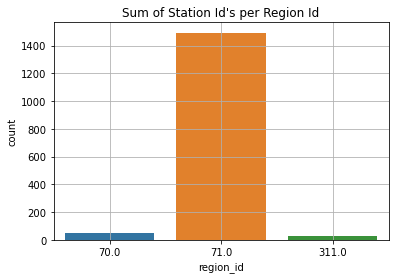

In [106]:
# jumlah station_id tiap region

sns.countplot(x='region_id', data=st)
plt.grid(True)
plt.title("Sum of Station Id's per Region Id")
plt.show()

In [107]:
st.groupby(['region_id'])['station_id'].count()

region_id
70.0       53
71.0     1493
311.0      25
Name: station_id, dtype: int64

Insight:

region_id 71 memiliki paling banyak station dibandingkan region yang lain. Sayangnya tidak diketahui nama atau negara bagian mana yang diwakilkan oleh masing-masing region_id

=====================================================================================

Akan dilakukan penggabungan antara tabel citibike_trips dan citibike_stations untuk menggabungkan data **region_id dan capacity**. 

Karena tidak ada kesamaan nama kolom yang dimiliki keduanya (sebagai irisan untuk digabungkan), maka pendekatan yang dilakukan adalah menggunakan data start_station_id untuk diubah sementara menjadi station_id, sehingga bisa menggabungkan data region_id. Selanjutnya kolom region_id yang didapat dari sini bisa diubah menjadi start_region_id. Hal yang sama dilakukan untuk end_station_id.

In [54]:
trips['station_id'] = trips['start_station_id']

In [55]:
trips.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_month,start_year,start_date,start_hour,stop_month,stop_year,stop_date,stop_hour,customer_age,station_id
0,857,2016-08-06 11:16:51,2016-08-06 11:31:08,332,Cherry St,40.712199,-73.979481,351,Front St & Maiden Ln,40.705310,...,August,2016,6,11,August,2016,6,11,59,332
1,567,2016-08-17 13:05:44,2016-08-17 13:15:11,3125,45 Rd & 11 St,40.747086,-73.949772,3126,44 Dr & Jackson Ave,40.747182,...,August,2016,17,13,August,2016,17,13,39,3125
2,660,2016-08-06 20:13:27,2016-08-06 20:24:27,217,Old Fulton St,40.702772,-73.993836,398,Atlantic Ave & Furman St,40.691652,...,August,2016,6,20,August,2016,6,20,45,217
3,947,2016-08-28 15:32:13,2016-08-28 15:48:00,217,Old Fulton St,40.702772,-73.993836,398,Atlantic Ave & Furman St,40.691652,...,August,2016,28,15,August,2016,28,15,62,217
4,474,2016-08-24 00:29:13,2016-08-24 00:37:07,3265,E 2 St & 2 Ave,40.724563,-73.989444,295,Pike St & E Broadway,40.714067,...,August,2016,24,0,August,2016,24,0,27,3265


In [56]:
stat = st[['station_id', 'capacity', 'region_id']]

In [57]:
stat.head()

,station_id,capacity,region_id
0,173,0,71.0
1,393,0,71.0
2,402,0,71.0
3,457,0,71.0
4,533,0,71.0


In [58]:
# cek baris dan kolom pada tabel citibike_trips
trips.shape

(29707, 25)

In [59]:
# cek jumlah baris dan kolom pada tabel citibike_stations
stat.shape

(1571, 3)

In [60]:
# cek jika kolom station_id temporary yang merupakan copy dari kolom start_station_id mencakup seluruh data
trips[trips['station_id'] == trips['start_station_id']].shape

(29707, 25)

In [61]:
# cek data unik pada kolom start_station_id tabel citibike_trips
trips['start_station_id'].nunique()

736

In [62]:
# cek data unik pada kolom station_id tabel citibike_stations
st['station_id'].nunique()

1571

In [63]:
# cek data pada kolom start_station_id tabel citibike_trips yang tidak ada pada kolom station_id tabel citibike_station

cek_trips = []

for i in trips['start_station_id']:
    cek_trips.append(i)

In [64]:
cek_stat = []

for i in st['station_id']:
    cek_stat.append(i)

In [65]:
cek = []

for i in cek_trips:
    if i not in cek_stat:
        cek.append(i)

In [66]:
print(len(cek))

5511


insight: 

Terdapat 5511 data pada kolom start_station_id tabel citibike_trips yang tidak ada pada kolom station_id tabel citibike_stations. Hal ini menyebabkan jika kedua tabel digabung dengan menggunakan data start_station_id menjadi data kolom temporary 'station_id' di tabel citibike_trips, akan ada 5511 baris data yang hilang dari data awal tabel citibike_trips (29707 baris).

Meskipun akan ada data yang hilang dari tabel utama citibike_trips, namun karena salah satu tujuan analisis ini adalah meninjau terhadap data region_id, maka merge/join table tetap harus dilakukan sehingga data region_id bisa masuk menjadi bagian dari data citibike_trips yang akan dianalisa.

Perbedaan jumlah data station_id pada tabel citibike_trips dan citibike_stations kemungkinan terjadi karena data station_id di salah satu tabel belum terupdate seperti pada tabel yang lain. Hal ini bisa menjadi catatan bagi pengelola tentang update data station_id, demikian juga dengan melengkapi data region_id mencakup wilayah atau kota mana saja, sehingga bisa disusun strategi marketing yang sesuai berdasarkan wilayah layanan.

In [67]:
# definisikan dataframe baru dari slicing table citibike_stations berisi kolom-kolom yang akan dianalisis 
# terhadap table citibike_trips
stat = st[['station_id', 'region_id', 'capacity']]

In [68]:
stat.head()

,station_id,region_id,capacity
0,173,71.0,0
1,393,71.0,0
2,402,71.0,0
3,457,71.0,0
4,533,71.0,0


In [69]:
stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  1571 non-null   int64  
 1   region_id   1571 non-null   float64
 2   capacity    1571 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 36.9 KB


In [70]:
# merge data tabel citibike_trips dengan data tabel stat (citibike_stations yang hanya berisikan kolom station_id,
# region_id, dan capacity)

df = trips.merge(stat, on='station_id')

In [71]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_date,start_hour,stop_month,stop_year,stop_date,stop_hour,customer_age,station_id,region_id,capacity
0,857,2016-08-06 11:16:51,2016-08-06 11:31:08,332,Cherry St,40.712199,-73.979481,351,Front St & Maiden Ln,40.705310,...,6,11,August,2016,6,11,59,332,71.0,36
1,978,2016-07-05 15:48:08,2016-07-05 16:04:26,332,Cherry St,40.712199,-73.979481,534,Water - Whitehall Plaza,40.702551,...,5,15,July,2016,5,16,45,332,71.0,36
2,717,2016-07-23 12:41:28,2016-07-23 12:53:26,332,Cherry St,40.712199,-73.979481,279,Peck Slip & Front St,40.707873,...,23,12,July,2016,23,12,39,332,71.0,36
3,979,2016-07-07 10:08:57,2016-07-07 10:25:17,332,Cherry St,40.712199,-73.979481,360,William St & Pine St,40.707179,...,7,10,July,2016,7,10,39,332,71.0,36
4,325,2016-07-12 06:57:52,2016-07-12 07:03:17,332,Cherry St,40.712199,-73.979481,307,Canal St & Rutgers St,40.714275,...,12,6,July,2016,12,7,60,332,71.0,36


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24196 entries, 0 to 24195
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tripduration             24196 non-null  int64         
 1   starttime                24196 non-null  datetime64[ns]
 2   stoptime                 24196 non-null  datetime64[ns]
 3   start_station_id         24196 non-null  int64         
 4   start_station_name       24196 non-null  object        
 5   start_station_latitude   24196 non-null  float64       
 6   start_station_longitude  24196 non-null  float64       
 7   end_station_id           24196 non-null  int64         
 8   end_station_name         24196 non-null  object        
 9   end_station_latitude     24196 non-null  float64       
 10  end_station_longitude    24196 non-null  float64       
 11  bikeid                   24196 non-null  int64         
 12  usertype                 24196 n

In [73]:
# ubah nama kolom region_id menjadi start_region_id
df = df.rename(columns={'region_id' : 'start_region_id'})

In [74]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_date,start_hour,stop_month,stop_year,stop_date,stop_hour,customer_age,station_id,start_region_id,capacity
0,857,2016-08-06 11:16:51,2016-08-06 11:31:08,332,Cherry St,40.712199,-73.979481,351,Front St & Maiden Ln,40.705310,...,6,11,August,2016,6,11,59,332,71.0,36
1,978,2016-07-05 15:48:08,2016-07-05 16:04:26,332,Cherry St,40.712199,-73.979481,534,Water - Whitehall Plaza,40.702551,...,5,15,July,2016,5,16,45,332,71.0,36
2,717,2016-07-23 12:41:28,2016-07-23 12:53:26,332,Cherry St,40.712199,-73.979481,279,Peck Slip & Front St,40.707873,...,23,12,July,2016,23,12,39,332,71.0,36
3,979,2016-07-07 10:08:57,2016-07-07 10:25:17,332,Cherry St,40.712199,-73.979481,360,William St & Pine St,40.707179,...,7,10,July,2016,7,10,39,332,71.0,36
4,325,2016-07-12 06:57:52,2016-07-12 07:03:17,332,Cherry St,40.712199,-73.979481,307,Canal St & Rutgers St,40.714275,...,12,6,July,2016,12,7,60,332,71.0,36


In [75]:
# drop data temporary: station_id

df.drop(columns=['station_id'], inplace=True)

In [76]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_year,start_date,start_hour,stop_month,stop_year,stop_date,stop_hour,customer_age,start_region_id,capacity
0,857,2016-08-06 11:16:51,2016-08-06 11:31:08,332,Cherry St,40.712199,-73.979481,351,Front St & Maiden Ln,40.705310,...,2016,6,11,August,2016,6,11,59,71.0,36
1,978,2016-07-05 15:48:08,2016-07-05 16:04:26,332,Cherry St,40.712199,-73.979481,534,Water - Whitehall Plaza,40.702551,...,2016,5,15,July,2016,5,16,45,71.0,36
2,717,2016-07-23 12:41:28,2016-07-23 12:53:26,332,Cherry St,40.712199,-73.979481,279,Peck Slip & Front St,40.707873,...,2016,23,12,July,2016,23,12,39,71.0,36
3,979,2016-07-07 10:08:57,2016-07-07 10:25:17,332,Cherry St,40.712199,-73.979481,360,William St & Pine St,40.707179,...,2016,7,10,July,2016,7,10,39,71.0,36
4,325,2016-07-12 06:57:52,2016-07-12 07:03:17,332,Cherry St,40.712199,-73.979481,307,Canal St & Rutgers St,40.714275,...,2016,12,6,July,2016,12,7,60,71.0,36


## ** Analisis Kolom 'region_id' **

In [77]:
stat['region_id'].value_counts()

71.0     1493
70.0       53
311.0      25
Name: region_id, dtype: int64

Pada tabel citibike_stations, terdapat 3 region id: 70, 71, dan 311, dimana station citibike yang paling banyak berada pada region 71

In [78]:
df['start_region_id'].value_counts()

71.0    24196
Name: start_region_id, dtype: int64

Insight:

Pada tabel trips keseluruhan yang sudah menggabungkan kolom region dari tabel citibike_stations, seluruh data yang ditampilkan merupakan data pada region yang sama, yaitu region 71, dimana dari tabel citibike_stations diketahui memang yang memiliki paling banyak stations daripada di region yang lain.

Kesimpulan sementara: analisis yang selanjutnya dilakukan merupakan data pada region yang sama, yaitu region 71 yang memiliki paling banyak stations daripada region 70 dan 311.

=====================================================================================

## ** Analisis Kolom 'tripduration' **

catatan: satuan duration dalam seconds. 1 day = 86400 seconds

In [79]:
# deskripsi statistik pada data dalam kolom tripduration
df['tripduration'].describe()

count     24196.000000
mean        857.617664
std        3537.271182
min          61.000000
25%         364.000000
50%         592.000000
75%         994.000000
max      289666.000000
Name: tripduration, dtype: float64

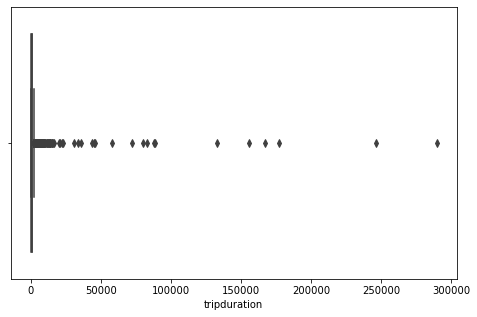

In [80]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['tripduration'])
plt.show()

Insight:

Kolom tripduration memiliki nilai standar deviasi yang tinggi, yang berarti selisih rentang datanya relatif lebar, dimana minimum penggunaan unit sepeda adalah selama 61 detik, atau 1 menit, sementara maksimum penggunaan 289.666 detik = 3 hari.

Dari boxplot di atas juga terlihat bahwa kolom tripduration memiliki value outliers. Namun value outliers di kolom ini tidak akan didrop karena menggambarkan variasi data dalam record durasi penggunaan unit citibike yang digunakan customer.

Processing data pada kolom ini akan dilakukan dengan cara binning, dimana value-value data dalam kolom akan dikategorikan berdasarkan kategori durasi pemakaian.

Kategori durasi pemakaian akan dibagi menjadi:
- kurang dari 1 jam
- lebih dari 1 jam

In [81]:
# buat kolom baru untuk mengetahui apakah durasi kurang atau lebih dari 1 jam
df['trip_duration_hour'] = df['tripduration'].apply(lambda x: x/3600)

In [82]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_date,start_hour,stop_month,stop_year,stop_date,stop_hour,customer_age,start_region_id,capacity,trip_duration_hour
0,857,2016-08-06 11:16:51,2016-08-06 11:31:08,332,Cherry St,40.712199,-73.979481,351,Front St & Maiden Ln,40.705310,...,6,11,August,2016,6,11,59,71.0,36,0.238056
1,978,2016-07-05 15:48:08,2016-07-05 16:04:26,332,Cherry St,40.712199,-73.979481,534,Water - Whitehall Plaza,40.702551,...,5,15,July,2016,5,16,45,71.0,36,0.271667
2,717,2016-07-23 12:41:28,2016-07-23 12:53:26,332,Cherry St,40.712199,-73.979481,279,Peck Slip & Front St,40.707873,...,23,12,July,2016,23,12,39,71.0,36,0.199167
3,979,2016-07-07 10:08:57,2016-07-07 10:25:17,332,Cherry St,40.712199,-73.979481,360,William St & Pine St,40.707179,...,7,10,July,2016,7,10,39,71.0,36,0.271944
4,325,2016-07-12 06:57:52,2016-07-12 07:03:17,332,Cherry St,40.712199,-73.979481,307,Canal St & Rutgers St,40.714275,...,12,6,July,2016,12,7,60,71.0,36,0.090278


In [83]:
df['trip_duration_hour'].describe()

count    24196.000000
mean         0.238227
std          0.982575
min          0.016944
25%          0.101111
50%          0.164444
75%          0.276111
max         80.462778
Name: trip_duration_hour, dtype: float64

In [84]:
# definisi kategori: less jika antara 0 - 1, more jika antara 1 - 81
# akan diartikan sebagai tripduration_of_1hr
bins = [0, 1, 81]
labels = ['less', 'more']

In [85]:
df['tripduration_of_1hr'] = pd.cut(df['trip_duration_hour'], bins=bins, labels=labels)

In [86]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_hour,stop_month,stop_year,stop_date,stop_hour,customer_age,start_region_id,capacity,trip_duration_hour,tripduration_of_1hr
0,857,2016-08-06 11:16:51,2016-08-06 11:31:08,332,Cherry St,40.712199,-73.979481,351,Front St & Maiden Ln,40.705310,...,11,August,2016,6,11,59,71.0,36,0.238056,less
1,978,2016-07-05 15:48:08,2016-07-05 16:04:26,332,Cherry St,40.712199,-73.979481,534,Water - Whitehall Plaza,40.702551,...,15,July,2016,5,16,45,71.0,36,0.271667,less
2,717,2016-07-23 12:41:28,2016-07-23 12:53:26,332,Cherry St,40.712199,-73.979481,279,Peck Slip & Front St,40.707873,...,12,July,2016,23,12,39,71.0,36,0.199167,less
3,979,2016-07-07 10:08:57,2016-07-07 10:25:17,332,Cherry St,40.712199,-73.979481,360,William St & Pine St,40.707179,...,10,July,2016,7,10,39,71.0,36,0.271944,less
4,325,2016-07-12 06:57:52,2016-07-12 07:03:17,332,Cherry St,40.712199,-73.979481,307,Canal St & Rutgers St,40.714275,...,6,July,2016,12,7,60,71.0,36,0.090278,less


In [87]:
# matriks tabel citibike_trips (df)
df.shape

(24196, 28)

In [88]:
# matriks tabel citibike_trips dimana durasi penggunaan lebih dari 1 jam
df[df['tripduration_of_1hr'] == 'more'].shape

(117, 28)

In [89]:
# matriks tabel citibike_trips dimana durasi penggunaan kurang dari 1 jam
df[df['tripduration_of_1hr'] == 'less'].shape

(24079, 28)

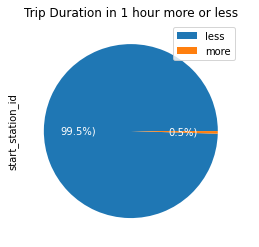

In [213]:
# Persentase pengguna berdasarkan durasi penggunaan
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%)".format(pct, absolute)

df.pivot_table(index=['tripduration_of_1hr'], values='start_station_id', aggfunc='count').plot.pie(y='start_station_id', \
title='Trip Duration in 1 hour more or less', autopct=lambda pct: func(pct, df['start_station_id']), textprops=dict(color="w"))
plt.show()

Pengguna citibike sharing didominasi oleh penggunaan durasi pendek, kurang dari 1 jam.

Untuk mendapatkan insight lebih lanjut, bisa dilakukan analisa terhadap kelompok yang menggunakan citibike sharing dengan durasi pemakaian kurang dari 1 jam; analisis dilakukan terhadap:
1. apakah customer menggunakan citibike pada station awal dan akhir yang sama?
2. distribusi waktu penggunaan citibike sharing untuk customer yang menggunakan kurang dari 1 jam dan lebih dari 1 jam
3. jenis pengguna (usertype) yang menggunakan service citibike sharing?

### 1.

### Apakah customer pada kelompok dengan pemakaian kurang dari 1 jam menggunakan citibike pada station awal dan akhir yang sama?

In [90]:
# define dataset untuk kelompok dengan penggunaan kurang dari 1 jam
less = df[df['tripduration_of_1hr'] == 'less']

In [91]:
less.shape

(24079, 28)

In [92]:
less[less['start_station_id'] == less['end_station_id']]['start_station_id'].count()

513

In [93]:
513/24079*100

2.1304871464761828

In [94]:
100-2.13

97.87

Insight:

Dari 24079 data pada kelompok penggunaan citibike kurang dari 1 jam, hanya 513 atau 2.13% customer yang memulai dan mengakhiri trip pada station yang sama. Sebanyak hampir 98% menggunakan citibike dari satu station ke station lainnya

Pertanyaan berikutnya yang bisa dicari dari data ini adalah:
apakah tipe customer yang menggunakan citibike dalam perjalanan pendek tanpa pindah station?

In [95]:
less[less['start_station_id'] == less['end_station_id']]['usertype'].value_counts()

Subscriber    498
Customer       15
Name: usertype, dtype: int64

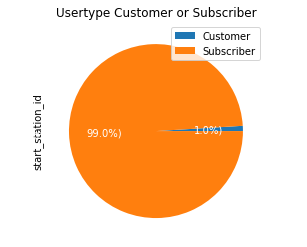

In [214]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%)".format(pct, absolute)

df.pivot_table(index=['usertype'], values='start_station_id', aggfunc='count').plot.pie(y='start_station_id', \
title='Usertype Customer or Subscriber', autopct=lambda pct: func(pct, df['start_station_id']), textprops=dict(color="w"))
plt.show()

Insight:

Sebanyak 99% pengguna merupakan member tahunan citibike sharing, sementara 1% sisanya menggunakan citibike sharing dengan metode 24-hour pass atau 7-day pass.

### 2.

### Distribusi waktu penggunaan citibike sharing untuk customer yang menggunakan kurang dari 1 jam dan lebih dari 1 jam

In [97]:
df[['start_hour', 'stop_hour']].describe().T

,count,mean,std,min,25%,50%,75%,max
start_hour,24196.0,13.623905,4.708750,0.0,10.0,14.0,17.0,23.0
stop_hour,24196.0,13.773888,4.736687,0.0,10.0,14.0,18.0,23.0


In [98]:
num = df[['start_hour', 'stop_hour']]

start_hour


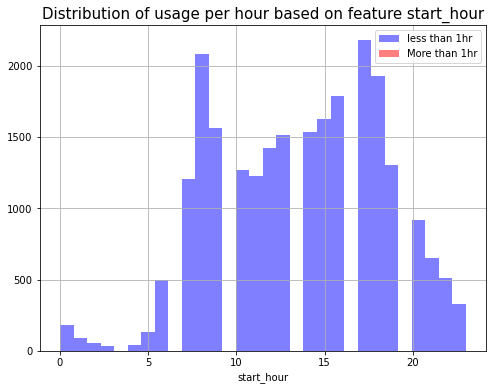

stop_hour


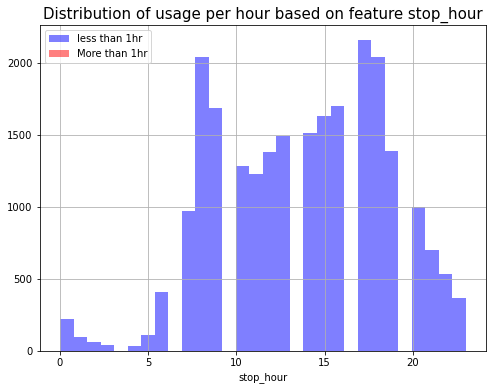

In [99]:
for i in num.columns:    
    plt.figure(figsize=(8, 6))
    print(i)
    df[df['tripduration_of_1hr'] == 'less'][i].hist(alpha=0.5, color='blue',
                                          bins=30, label = 'less than 1hr')
    df[df['tripduration_of_1hr'] == 0][i].hist(alpha=0.5, color='red',
                                          bins=30, label = 'More than 1hr')
    plt.legend()
    plt.title(f"Distribution of usage per hour based on feature {i}", fontsize=15)
    plt.xlabel(f"{i}")
    plt.show()

Insight:

Tidak terlihat beda yang signifikan antara pengguna citibike sharing yang menggunakan lebih dari 1 jam dan kurang dari 1 jam, karena pengguna dengan durasi pemakaian lebih dari 1 jam relatif lebih sedikit daripada pengguna dengan pemakaian lebih dari 1 jam.

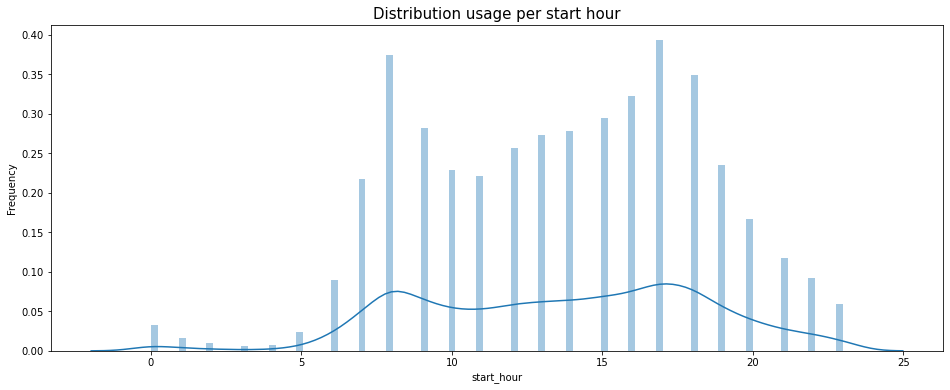

In [126]:
plt.figure(figsize=(16, 6))
plt.title("Distribution usage per start hour", fontsize=15)
plt.ylabel('Frequency', fontsize=10)
sns.distplot(df['start_hour'], bins=100)
plt.show()

Insight:

Dari kurva distribusi di atas, bisa terlihat bahwa jenis kurva adalah bimodal, yang memiliki 2 puncak (nilai modus), yaitu pada pukul 8 pagi dan 5 sore. Hal ini kemungkinan berkorelasi dengan waktu perjalan berangkat dan pulang kerja.

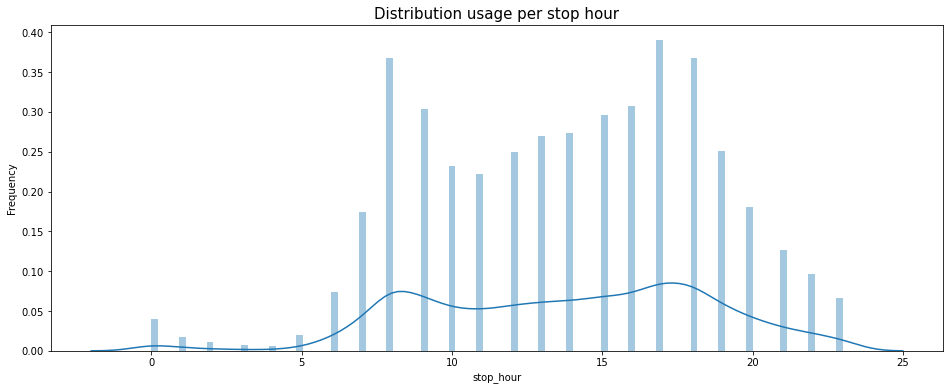

In [127]:
plt.figure(figsize=(16, 6))
plt.title("Distribution usage per stop hour", fontsize=15)
plt.ylabel('Frequency', fontsize=10)
sns.distplot(df['stop_hour'], bins=100)
plt.show()

Hal yang sama juga terlihat pada distribusi waktu penggunaan pada saat trip berakhir.

=================================================================================

## ** Analisis kolom usertype **

In [102]:
df['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

In [103]:
df['usertype'].value_counts()

Subscriber    23962
Customer        234
Name: usertype, dtype: int64

In [104]:
print(f"Persentase pengguna yang terdaftar sebagai membership tahunan adalah: {round(23962/(23962+234)*100)}%")

Persentase pengguna yang terdaftar sebagai membership tahunan adalah: 99%


Keterangan:

Kolom usertype memberikan informasi tentang kategori pengguna: subscriber, yaitu member tahunan, atau customer (24 hour pass atau 7 day pass). Kebanyakan pengguna citibike sharing merupakan member tahunan, sementara sejumlah kecil lainnya menggunakan citibike dengan metode pembelian pass harian (24 jam) atau mingguan (7 hari)

### **beberapa insight yang telah didapatkan**

1. Kebanyakan penggunaan merupakan penggunaan dengan durasi pendek, kurang dari 1 jam
2. Persentase pengguna yang terdaftar sebagai membership tahunan adalah 99%
3. Dari kurva terhadap distribusi waktu penggunaan citibike sharing, terlihat bahwa kurva distribusi merupakan bimodal yang memiliki 2 nilai modus. Baik pada saat start maupun stop penggunaan citibike sharing, waktu dimana terdapat paling banyak penggunaan adalah jam 8 pagi dan 5 sore. Waktu-waktu ini sesuai dengan jam masuk dan pulang kantor.

## **Analisis**

Pengguna yang terdaftar sebagai member tahunan menggunakan jasa citibike sharing sebagai alat transportasi menuju kantor dan pulang dari kantor. Oleh karena itu penggunaan citibike sharing umumnya dalam durasi penggunaan kurang dari 1 jam, karena citibike sharing secara umum digunakan sebagai moda transportasi penunjang kegiatan bekerja, bukan kegiatan olahraga atau sepeda santai.

Analisis serta saran lebih lanjut mengenai segmentasi user atau strategi marketing yang dapat dilakukan perusahaan akan dibuat secara lebih menyeluruh setelah mendapat gambaran usia dan gender user.

=====================================================================================

## ** Analisis terhadap feature age **

Distribusi usia pengguna citibike sharing:

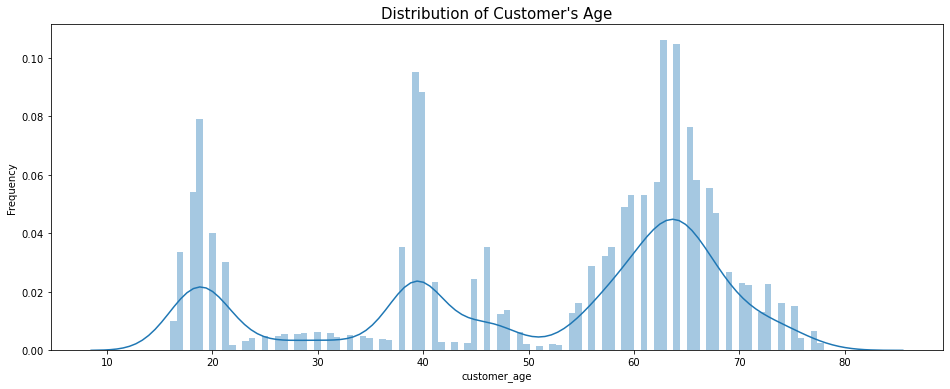

In [125]:
plt.figure(figsize=(16, 6))
plt.title("Distribution of Customer's Age", fontsize=15)
plt.ylabel('Frequency', fontsize=10)
sns.distplot(df['customer_age'], bins=100)

plt.show()

Kurva distribusi di atas menunjukkan bahwa distribusi usia pengguna citibike sharing terdistribusi secara trimodal/multimodal, dimana terdapat 3 puncak dalam kurva distribusinya. 

Puncak pertama berada pada rentang usia dibawah 20 tahun, puncak kedua berada di rentang usia sekitar 40 tahun, dan data usia dengan frekuensi tertinggi berada pada rentang usia antara 60 dan 70 tahun.

In [123]:
# slicing pada rentang usia 10 - 20 tahun untuk menentukan usia yang memiliki frekuensi penggunaan paling tinggi
df[(df['customer_age'] > 10) & (df['customer_age'] < 20)]['customer_age'].mode()

0    19
dtype: int64

In [124]:
# slicing pada rentang usia 35 - 45 tahun untuk menentukan usia yang memiliki frekuensi penggunaan paling tinggi
df[(df['customer_age'] > 35) & (df['customer_age'] < 45)]['customer_age'].mode()

0    39
dtype: int64

In [128]:
# slicing pada rentang usia 60 - 70 tahun untuk menentukan usia yang memiliki frekuensi penggunaan paling tinggi
df[(df['customer_age'] > 60) & (df['customer_age'] < 70)]['customer_age'].mode()

0    63
dtype: int64

Insight:

Pengguna citibike sharing paling banyak berusia 19, 39, dan 63 tahun. Usia pengguna 19 dan 39 tahun sesuai dengan analisa sebelumnya yang menunjukkan bahwa pengguna utama citibike merupakan pegawai/karyawan perkantoran, yang terlihat menggunakan service citibike sharing untuk menunjang kegiatan harian pergi dan pulang kantor, namun perlu dilakukan peninjauan lebih lanjut mengenai customer pada rentang usia antara 60 dan 70 tahun, khususnya 63 tahun.

Analisis dapat dilakukan dengan mengkategorikan usia pengguna sebagai: teenage (karena usia minimum pengguna adalah 16 tahun), adult, senior

In [165]:
df['customer_age'].describe()

count    24196.000000
mean        50.597619
std         17.771625
min         16.000000
25%         39.000000
50%         59.000000
75%         64.000000
max         78.000000
Name: customer_age, dtype: float64

In [159]:
# definisi kategori: teenage (< 20 tahun), adult (20 - 59), senior (60 tahun keatas)
bins = [0, 20, 60, 79]
labels = ['teenage', 'adult', 'senior']

In [160]:
df['age_category'] = pd.cut(df['customer_age'], bins=bins, labels=labels)

In [161]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,stop_month,stop_year,stop_date,stop_hour,customer_age,start_region_id,capacity,trip_duration_hour,tripduration_of_1hr,age_category
0,857,2016-08-06 11:16:51,2016-08-06 11:31:08,332,Cherry St,40.712199,-73.979481,351,Front St & Maiden Ln,40.705310,...,August,2016,6,11,59,71.0,36,0.238056,less,adult
1,978,2016-07-05 15:48:08,2016-07-05 16:04:26,332,Cherry St,40.712199,-73.979481,534,Water - Whitehall Plaza,40.702551,...,July,2016,5,16,45,71.0,36,0.271667,less,adult
2,717,2016-07-23 12:41:28,2016-07-23 12:53:26,332,Cherry St,40.712199,-73.979481,279,Peck Slip & Front St,40.707873,...,July,2016,23,12,39,71.0,36,0.199167,less,adult
3,979,2016-07-07 10:08:57,2016-07-07 10:25:17,332,Cherry St,40.712199,-73.979481,360,William St & Pine St,40.707179,...,July,2016,7,10,39,71.0,36,0.271944,less,adult
4,325,2016-07-12 06:57:52,2016-07-12 07:03:17,332,Cherry St,40.712199,-73.979481,307,Canal St & Rutgers St,40.714275,...,July,2016,12,7,60,71.0,36,0.090278,less,adult


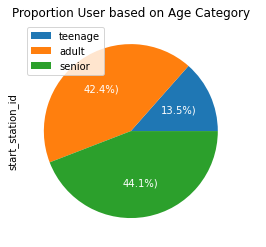

In [215]:
# Persentase pengguna berdasarkan kategori usia
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%)".format(pct, absolute)

df.pivot_table(index=['age_category'], values='start_station_id', aggfunc='count').plot.pie(y='start_station_id', \
title='Proportion User based on Age Category', autopct=lambda pct: func(pct, df['start_station_id']), textprops=dict(color="w"))
plt.show()

Insight:

Kategori pengguna paling banyak merupakan kelompok senior, yaitu pengguna berusia 60 tahun atau lebih, diikuti dengan kategori dewasa (20 tahun atau lebih), kemudian remaja (< 20 tahun)

In [134]:
# deskripsi statistik data usia pengguna pada rentang usia 60 dan 70 tahun
df[(df['customer_age'] > 60) & (df['customer_age'] < 70)]['customer_age'].describe()

count    8787.000000
mean       64.514282
std         2.222921
min        61.000000
25%        63.000000
50%        64.000000
75%        66.000000
max        69.000000
Name: customer_age, dtype: float64

In [163]:
# slicing data pengguna diatas 60 tahun
senior_user = df[df['customer_age'] > 60]

In [156]:
senior_user['birth_year'].describe()

count    10680.000000
mean      1949.562079
std          4.012328
min       1937.000000
25%       1947.000000
50%       1951.000000
75%       1952.000000
max       1956.000000
Name: birth_year, dtype: float64

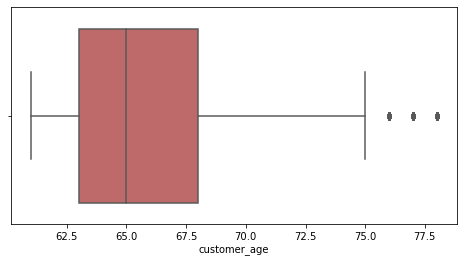

In [211]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=senior_user, x='customer_age', color='indianred')
plt.show()

In [153]:
senior_user['customer_age'].median()

65.0

Dari boxplot di atas, distribusi pengguna citibike berusia diatas 60 tahun memiliki positive skewness. Hal ini menunjukkan bahwa untuk customer diatas usia 60 tahun, distribusi pengguna berada lebih banyak pada data usia diatas median data, atau 65 tahun. 

Analisis:

Pengguna citibike dalam kategori pengguna senior (60 tahun atau lebih) merupakan pengguna terbanyak citibike dengan proporsi 44.1%, diikuti oleh pengguna kategori adult (20 sampai 59 tahun) sebanyak 42.4%, dan teenage sebanyak 13.5%. Hal ini menunjukkan bahwa ketertarikan customer senior untuk menggunakan citibike yang tinggi.

Hal lain yang harus dievaluasi adalah form atau app pengisian data customer, karena pada tahap data preparation terdapat value outliers yang salah satunya adalah terdapat pengguna berusia 143 tahun. Evaluasi metode pengisian data customer antara lain tentang apakah metode yang digunakan adalah metode pengisian form di app secara manual? Jika ya, dapat dievaluasi pada UI yang digunakan, apakah rentang kolom 'birth year' pada rentang tahun 1956 kebawah berpotensi dipilih dengan lebih mudah daripada rentang input birth year yang lain, yang menyebabkan kesalahan input oleh user.

======================================================================================

## ** Analisis terhadap feature gender **

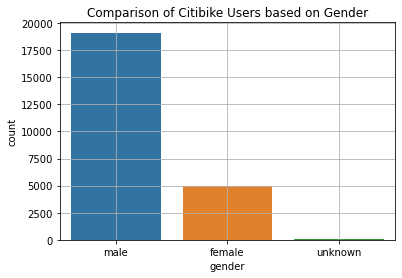

In [110]:
sns.countplot(x='gender', data=df)
plt.grid(True)
plt.title('Comparison of Citibike Users based on Gender')
plt.show()

In [111]:
df['gender'].value_counts()

male       19114
female      5011
unknown       71
Name: gender, dtype: int64

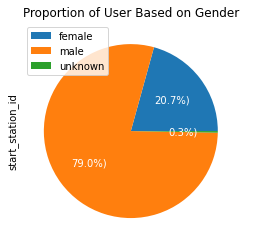

In [216]:
# Persentase pengguna berdasarkan gender
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%)".format(pct, absolute)

df.pivot_table(index=['gender'], values='start_station_id', aggfunc='count').plot.pie(y='start_station_id', \
title='Proportion of User Based on Gender', autopct=lambda pct: func(pct, df['start_station_id']), textprops=dict(color="w"))
plt.show()

Pengguna citibike sharing didominasi oleh kelompok laki-laki sebanyak 79%, sementara pengguna perempuan sebanyak 20.7%. Sisanya merupakan pengguna yang tidak mengisi data identifikasi gender.

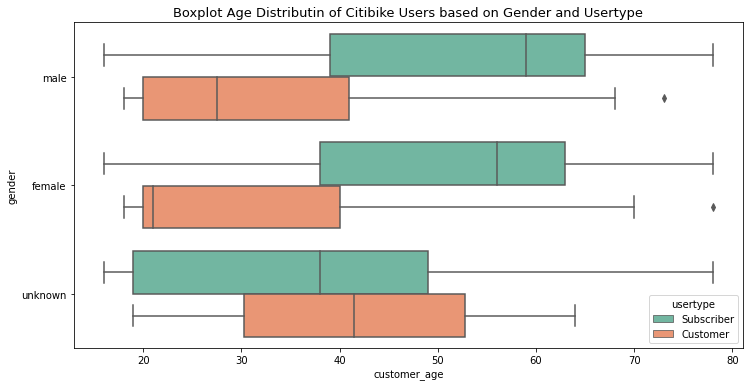

In [209]:
plt.figure(figsize=(12, 6))
plt.title('Boxplot Age Distributin of Citibike Users based on Gender and Usertype', size=13)
sns.boxplot(x="customer_age", y="gender", hue='usertype',
                 data=df, palette="Set2", orient='h')
plt.show()

## *Analisis:*

**Male**

Jika dibandingkan antara pengguna kategori pria yang apply sebagai member tahunan dan yang menggunakan citibike dengan metode 24-hr atau 7-day pass, kelompok yang merupakan member tahunan terdistribusi pada rentang usia dewasa - senior dan negatively skewed. Sementara pengguna pass terdistribusi pada usia dewasa dan positively skewed. Negative skew pada kategori member tahunan menunjukkan data lebih banyak terdistribusi pada bagian kiri kurva (usia dewasa dibawah 60 tahun). Hal ini sejalan dengan insight sebelumnya yang menunjukkan bahwa pengguna utama citibike sharing adalah pegawai/pekerja kantor, dalam hal ini didominasi oleh gender laki-laki.
Dari boxplot customer atau pengguna casual yang menggunakan temporary pass, skewness ke arah kanan kurva, yang menunjukkan bahwa data lebih banyak terdistribusi pada usia diatas 20 tahun (khususnya 20 tahun akhir).


**Female**


Seperti halnya pada pengguna kelompok pria yang terdaftar sebagai member tahunan, kelompok customer wanita yang apply membership juga berada pada rentang usia dewasa hingga senior, dan merupakan distribusi negative skewness. Namun yang berbeda dari kelompok pria adalah kelompok wanita banyak terdistribusi di usia 50 tahun akhir - lebih muda dari kelompok pengguna pria. Hal yang similar ditampilkan pada boxplot customer wanita yang menggunakan citibike dengan pass/casual. Rentang antar quartile berada pada 20 sampai 40 tahun, namun data lebih banyak terdistribusi diatas usia yang lebih muda dari customer pria dengan kategori yang sama, yaitu pada 20 tahun awal.


**Unknown**
   
kelompok yang tidak mendefinisikan gendernya dan menggunakan metode bike sharing dengan 24-hour pass atau 7-day pass terlihat distribusi usianya relatif normal, dimana nilai median maupun modus terletak di tengah-tengah kurva, dan panjang whiskers boxplot relatif tidak berbeda antara whisker kanan dan kiri. Hal ini kemungkinan terjadi karena kelompok customer ini memiliki data yang sedikit dibandingkan yang lain (persentase jumlah kategori user unknown dibandingkan gender lainnya hanya 0.3%).

Poin lain yang terlihat dari boxplot adalah data customer gender unknown yang memiliki annual membership lebih banyak berada pada sebelah kiri kurva, yaitu kurang dari 40 tahun. Rentang customer kelompok ini berada pada usia remaja (kurang dari 20 tahun) sampai dewasa (kurang dari 50 tahun), dan terdapat beberapa data di luar rentang tsb.

=============================================================================

Analisis dilakukan terhadap feature-feature tripduration & number of trips, segmentasi user (age, gender), usertype, dan region_id

Beberapa insight yang didapatkan dari analisis antara lain:

1.	Pada dataset akhir hasil penggabungan antara table citibike_trips dan citibike_stations, dataset ini hanya mencakup 1 region. Hal ini terjadi karena data stations_id (baik start station ataupun end station) yang terdapat di tabel citibike_trips tidak ada dalam tabel citibike_stations.
2.	Sebanyak 99.5% customer citibike memanfaatkan service bike sharing untuk durasi perjalanan yang pendek (kurang dari 1 jam), dan tidak digunakan antar station yang sama (start station beda dengan end station)
3.	Sebanyak 99% customer citibike merupakan member tahunan (Subscriber), sementara 1% menggunakannya dengan metode 24-hour atau 7-day pass.
4.	Analisa berdasarkan waktu dalam 24 jam menunjukkan bahwa penggunaan citibike paling banyak terjadi pada pukul 8.00 dan 17.00.
5.	Pengguna citibike sharing paling banyak berusia 19, 39, dan 63 tahun.
6.	Pengguna citibike sharing didominasi oleh customer pria, yaitu sebesar 79%, diikuti oleh customer Wanita 20.3%, dan sisanya oleh customer yang tidak mendefinisikan gendernya (0.3%).
7.	Ketertarikan customer senior yang tinggi terhadap service citibike sharing (pengguna citibike sharing kategori senior memiliki porsi 44.1%).


# **Kesimpulan**

1.	Pengguna utama citibike yang terdaftar sebagai annual member merupakan segmen pekerja kantor/karyawan, yang memanfaatkan service citibike untuk menunjang rutinitas berangkat dan pulang kantor. 
2.	Pengguna casual kemungkinan belum memerlukan service citibike secara rutin atau sebagai penunjang kegiatan sehari-hari. Kelompok ini kemungkinan bukan merupakan kelompok pekerja kantor. Namun jika memang membutuhkan service citibike sharing untuk penunjang rutinitas, sangat memungkinkan jika customer kelompok casual beralih untuk apply sebagai member tahunan.

# **Saran**

Yang dapat dilakukan oleh pengelola citibike sharing adalah menambah stations di kawasan perkantoran, sehingga diharapkan bisa menarik minat pegawai/pengguna utama citibike untuk subscribe annual membership. Namun ekspansi ini harus disertau dengan recording database yang selalu diupdate, sehingga dapat diketahui lokasi spesifik guna strategi pengembangan usaha per kawasan, juga mendeteksi potensi adanya masalah di lapangan.

Hal lain yang harus dievaluasi adalah pengisian form pengguna citibike sharing, terutama untuk pengisian data birth_year, apakan ada permasalahan pada User Interfacenya, sehingga customer berpotensi menginput data yang tidak sesuai/salah.